Link dataset:https://www.kaggle.com/datasets/ispritchin/food-4-pizza-risotto-steak-sushi

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d ispritchin/food-4-pizza-risotto-steak-sushi

 96% 189M/196M [00:01<00:00, 163MB/s]
100% 196M/196M [00:01<00:00, 124MB/s]


In [3]:
!unzip food-4-pizza-risotto-steak-sushi.zip -d dataset_directory

Archive:  food-4-pizza-risotto-steak-sushi.zip
  inflating: dataset_directory/food-4/test/pizza/2667824.jpg  
  inflating: dataset_directory/food-4/test/pizza/2670730.jpg  
  inflating: dataset_directory/food-4/test/pizza/2671508.jpg  
  inflating: dataset_directory/food-4/test/pizza/2674351.jpg  
  inflating: dataset_directory/food-4/test/pizza/2687575.jpg  
  inflating: dataset_directory/food-4/test/pizza/2693334.jpg  
  inflating: dataset_directory/food-4/test/pizza/2694223.jpg  
  inflating: dataset_directory/food-4/test/pizza/2697971.jpg  
  inflating: dataset_directory/food-4/test/pizza/2700543.jpg  
  inflating: dataset_directory/food-4/test/pizza/2702825.jpg  
  inflating: dataset_directory/food-4/test/pizza/2705497.jpg  
  inflating: dataset_directory/food-4/test/pizza/2707814.jpg  
  inflating: dataset_directory/food-4/test/pizza/2711828.jpg  
  inflating: dataset_directory/food-4/test/pizza/2719697.jpg  
  inflating: dataset_directory/food-4/test/pizza/2722646.jpg  
  inflat

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [5]:
path = '/content/dataset_directory'

In [6]:
import os

In [7]:
data = os.listdir(path)
data

['food-4']

#Mengatur path dataset menjadi 3 train, val, test

In [8]:
train_dir = '/content/dataset_directory'
validation_dir = '/content/dataset_directory'
test_dir = '/content/dataset_directory'

#Menggunakan ImageDataGenerator untuk memuat serta melakukan augmentasi pada data

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#Split dataset menjadi train, val, dan test

Data Split

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 4000 images belonging to 1 classes.


Data Val

In [12]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 4000 images belonging to 1 classes.


Data Tes

In [13]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 4000 images belonging to 1 classes.


Membuat model sequential

In [14]:
model = Sequential()

# Menggunakan pre-trained model VGG16

In [15]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
base_model.trainable = False

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

58889256/58889256 [==============================] - 0s 0us/step


# Menggunakan optimizer, loss, dan metrics

In [16]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks

In [17]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

# Latih Model

In [23]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/5
125/125 [==============================] - 53s 428ms/step - loss: 2.0521e-20 - accuracy: 1.0000 - val_loss: 5.1529e-19 - val_accuracy: 1.0000 - lr: 1.0000e-08
Epoch 2/5
125/125 [==============================] - 43s 345ms/step - loss: 1.0001e-19 - accuracy: 1.0000 - val_loss: 5.1529e-19 - val_accuracy: 1.0000 - lr: 1.0000e-08
Epoch 3/5
125/125 [==============================] - 43s 343ms/step - loss: 1.4729e-20 - accuracy: 1.0000 - val_loss: 5.1529e-19 - val_accuracy: 1.0000 - lr: 1.0000e-08
Epoch 4/5
125/125 [==============================] - 44s 353ms/step - loss: 1.4426e-20 - accuracy: 1.0000 - val_loss: 5.1529e-19 - val_accuracy: 1.0000 - lr: 1.0000e-08
Epoch 5/5
125/125 [==============================] - 43s 342ms/step - loss: 6.8988e-21 - accuracy: 1.0000 - val_loss: 5.1529e-19 - val_accuracy: 1.0000 - lr: 1.0000e-09


In [24]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Akurasi pada data test: {test_accuracy:.2f}')

125/125 [==============================] - 11s 89ms/step - loss: 5.1529e-19 - accuracy: 1.0000
Akurasi pada data test: 1.00


# Membuat grafik pergerakan metrik Accuracy dan Loss terhadap epoch pada Training dan Validation

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Grafik Accuracy

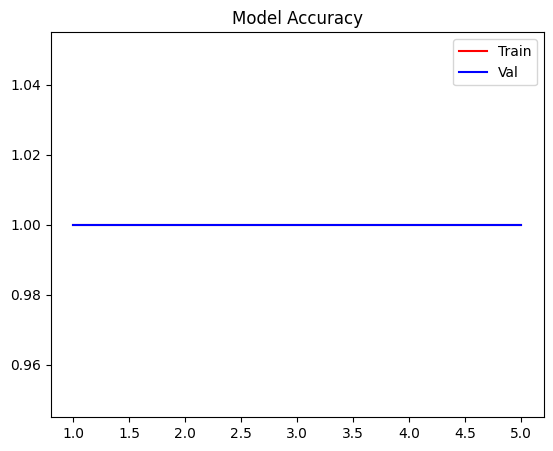

In [26]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Train')
plt.plot(epochs, val_acc, 'b', label='Val')
plt.title('Model Accuracy')
plt.legend()

# Grafik Loss

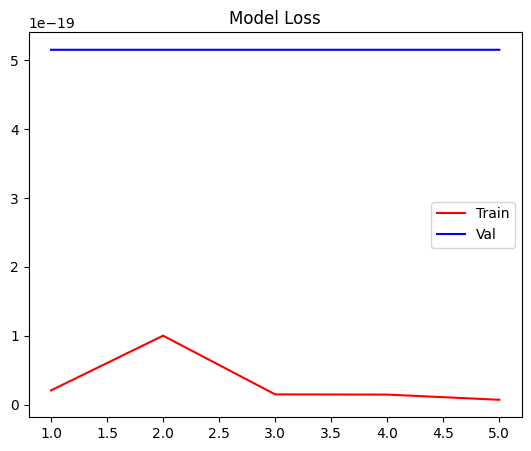

In [27]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, val_loss, 'b', label='Val')
plt.title('Model Loss')
plt.legend()

plt.show()

# Menampilkan Gambar

In [28]:
from tensorflow.image import random_brightness
from tensorflow.keras.utils import load_img

In [29]:
path_gambar = '/content/dataset_directory/food-4/test/pizza/2667824.jpg'

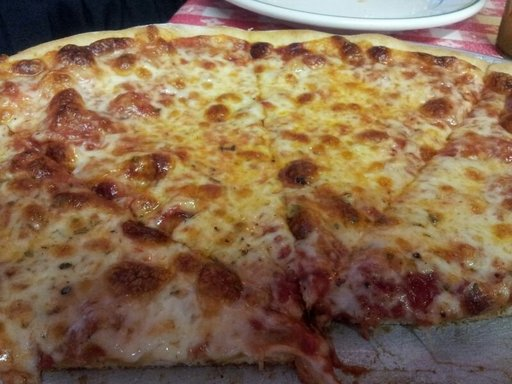

In [33]:
image = load_img(path_gambar)
image

In [35]:
bright = random_brightness(image, max_delta=5)

Text(0.5, 1.0, 'gambar sebelum argumentasi')

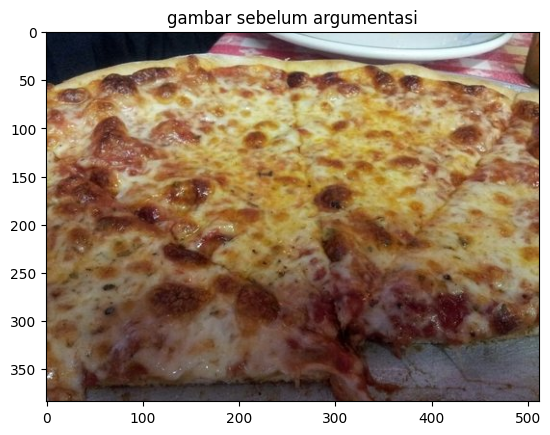

In [36]:
plt.imshow(image)
plt.title('gambar sebelum argumentasi')